In [5]:
import pandas as pd
!unzip Mental_Health_in_Tech_Survey.zip

Archive:  Mental_Health_in_Tech_Survey.zip
  inflating: Mental Health in Tech Survey/survey.csv  


In [6]:
mental = pd.read_csv('survey.csv')
import pandas as pd
pd.options.display.max_columns = None


In [7]:
mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
print(mental.duplicated().sum())

0


In [9]:
mental.columns = mental.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
#mental.drop(columns=[['timestamp','state','comments','anonymity']], inplace=True)
mental.drop(columns=['timestamp'], inplace=True)


In [11]:
mental.drop(columns=['state'], inplace=True)
mental.drop(columns=['comments'], inplace=True)
mental.drop(columns=['anonymity'], inplace=True)

In [12]:
mental['work_interfere'] = mental['work_interfere'].fillna(mental['work_interfere'].mode()[0])

In [13]:
print(mental['gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [14]:
mental['gender'] = mental['gender'].str.lower()
print(mental['gender'].unique())

['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']


In [15]:
gender_mapping = {
    'female': 'Female',
    'm': 'Male',
    'male': 'Male',
    'male-ish': 'Male',
    'maile': 'Male',
    'trans-female': 'Female',
    'cis female': 'Female',
    'f': 'Female',
    'something kinda male?': 'Male',
    'cis male': 'Male',
    'woman': 'Female',
    'mal': 'Male',
    'male (cis)': 'Male',
    'queer/she/they': 'Female',
    'non-binary': 'Non-Binary',
    'femake': 'Female',
    'make': 'Male',
    'nah': 'Non-Binary',
    'all': 'Non-Binary',
    'enby': 'Non-Binary',
    'fluid': 'Non-Binary',
    'genderqueer': 'Non-Binary',
    'female ': 'Female',
    'androgyne': 'Non-Binary',
    'agender': 'Non-Binary',
    'cis-female/femme': 'Female',
    'guy (-ish) ^_^': 'Male',
    'male leaning androgynous': 'Male',
    'male ': 'Male',
    'man': 'Male',
    'trans woman': 'Female',
    'msle': 'Male',
    'neuter': 'Non-Binary',
    'female (trans)': 'Male',
    'queer': 'Non-Binary',
    'female (cis)': 'Female',
    'mail': 'Male',
    'a little about you': 'Non-Binary',
    'malr': 'Male',
    'p': 'Non-Binary',
    'femail' : 'Female',
    'cis man': 'Male',
    'ostensibly male, unsure what that really means': 'Male'
}
mental['gender'] = mental['gender'].map(gender_mapping)

print(mental['gender'].unique())

['Female' 'Male' 'Non-Binary']


In [16]:
mental['gender'] = mental['gender'].fillna('Unknown')

print(mental['gender'].unique())
print(mental['gender'].value_counts())

['Female' 'Male' 'Non-Binary']
gender
Male          997
Female        250
Non-Binary     12
Name: count, dtype: int64


In [17]:
mental = mental[mental['gender'] != 'Non-Binary']

print(mental['gender'].unique())
print(mental.shape)

['Female' 'Male']
(1247, 23)


In [18]:
from sklearn.preprocessing import LabelEncoder
mental['gender'] = LabelEncoder().fit_transform(mental['gender'])
print(mental.head())

   age  gender         country self_employed family_history treatment  \
0   37       0   United States           NaN             No       Yes   
1   44       1   United States           NaN             No        No   
2   32       1          Canada           NaN             No        No   
3   31       1  United Kingdom           NaN            Yes       Yes   
4   31       1   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company    benefits  \
0          Often            6-25          No          Yes         Yes   
1         Rarely  More than 1000          No           No  Don't know   
2         Rarely            6-25          No          Yes          No   
3          Often          26-100          No          Yes          No   
4          Never         100-500         Yes          Yes         Yes   

  care_options wellness_program   seek_help               leave  \
0     Not sure               No         Yes       Somew

In [19]:
import pandas as pd
bins = [0, 14, 20, 35, 45, 60]
bins_labels = ['Child', 'Teenager', 'Young_Adult', 'Adult', 'Senior']
mental['age_groups'] = pd.cut(mental['age'], bins=bins, labels=bins_labels)
mental_clean = pd.get_dummies(mental, columns=['age_groups'], prefix='age_groups', drop_first=False)
print(mental_clean.head())

   age  gender         country self_employed family_history treatment  \
0   37       0   United States           NaN             No       Yes   
1   44       1   United States           NaN             No        No   
2   32       1          Canada           NaN             No        No   
3   31       1  United Kingdom           NaN            Yes       Yes   
4   31       1   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company    benefits  \
0          Often            6-25          No          Yes         Yes   
1         Rarely  More than 1000          No           No  Don't know   
2         Rarely            6-25          No          Yes          No   
3          Often          26-100          No          Yes          No   
4          Never         100-500         Yes          Yes         Yes   

  care_options wellness_program   seek_help               leave  \
0     Not sure               No         Yes       Somew

In [20]:
mental = mental.dropna(subset=['self_employed'])
mental = mental[mental['self_employed'].isin(['Yes', 'No'])]

In [21]:
print(mental['self_employed'].unique())

['Yes' 'No']


In [22]:
yes_no_columns = ['family_history', 'treatment', 'self_employed', 'remote_work','tech_company','benefits','care_options','wellness_program','seek_help','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence']

mental[yes_no_columns] = mental[yes_no_columns].replace({"Some of them":2, "Maybe":2, "Don't know":2, "Not sure":2, "Yes": 1, "No": 0})

<ipython-input-22-d8fab0052583>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mental[yes_no_columns] = mental[yes_no_columns].replace({"Some of them":2, "Maybe":2, "Don't know":2, "Not sure":2, "Yes": 1, "No": 0})


In [23]:
print(mental.head())

    age  gender        country  self_employed  family_history  treatment  \
18   46       1  United States              1               1          0   
19   36       1         France              1               1          0   
20   29       1  United States              0               1          1   
21   31       1  United States              1               0          0   
22   46       1  United States              0               0          1   

   work_interfere no_employees  remote_work  tech_company  benefits  \
18      Sometimes          1-5            1             1         1   
19      Sometimes         6-25            1             1         0   
20      Sometimes      100-500            0             1         1   
21          Never          1-5            1             1         0   
22          Often       26-100            1             1         1   

    care_options  wellness_program  seek_help               leave  \
18             2                 1          2  

In [24]:
#treatment, work_interfere, tech_company,age_groups
tech_data = mental[mental['tech_company'] == 1]
mental_health_distribution = tech_data.groupby('age_groups')[['treatment','benefits','care_options','wellness_program','seek_help']].value_counts(normalize=True).unstack()

print(mental_health_distribution)

seek_help                                                           0    1  \
age_groups treatment benefits care_options wellness_program                  
Child      0         0        0            0                 0.000000  0.0   
                                           1                 0.000000  0.0   
                                           2                 0.000000  0.0   
                              1            0                 0.500000  0.0   
                                           1                 0.000000  0.0   
...                                                               ...  ...   
Senior     1         2        1            1                 0.000000  0.0   
                                           2                 0.000000  0.0   
                              2            0                 0.022222  0.0   
                                           1                 0.000000  0.0   
                                           2                 0.0

<ipython-input-24-35d430a454f1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_distribution = tech_data.groupby('age_groups')[['treatment','benefits','care_options','wellness_program','seek_help']].value_counts(normalize=True).unstack()


In [25]:
mental.describe()

,age,gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.00000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,30.805533,0.800651,0.114727,0.387307,0.502034,0.297803,0.816924,1.026037,0.847844,0.477624,0.77380,0.995118,0.484133,1.411717,0.965012,0.353133,1.044752,1.194467,0.144020
std,51.424057,0.399674,0.318822,0.487333,0.500199,0.457479,0.386886,0.788335,0.791108,0.738999,0.86608,0.877687,0.830476,0.810995,0.768632,0.743452,0.916968,0.832231,0.351252
min,-1726.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
max,329.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


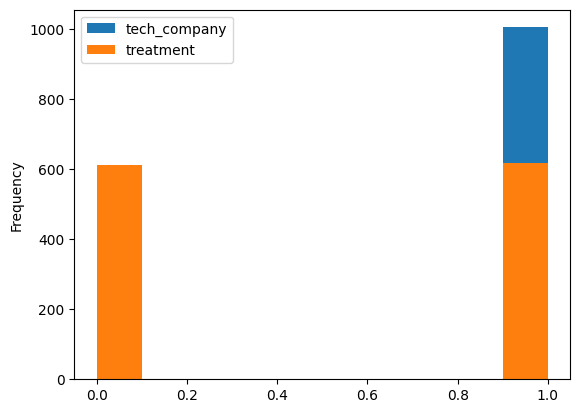

In [26]:
import matplotlib.pyplot as plt

his = mental.plot.hist(column=['tech_company','treatment'], sharex=True, sharey=True)

In [27]:
mental_tech = mental[mental['tech_company'] == 1]

In [28]:
mental_health_distribution = mental_tech.groupby('age_groups')[
    ['treatment','benefits','care_options','wellness_program','seek_help']
    ].apply(lambda x: (x == 1).mean() * 100)

print(mental_health_distribution)

             treatment   benefits  care_options  wellness_program  seek_help
age_groups                                                                  
Child         0.000000   0.000000     50.000000          0.000000   0.000000
Teenager     42.105263  15.789474     15.789474          5.263158  15.789474
Young_Adult  47.540984  32.923497     31.967213         13.934426  14.617486
Adult        55.172414  46.305419     40.394089         18.719212  24.630542
Senior       57.777778  48.888889     51.111111         35.555556  35.555556


<ipython-input-28-21936f5113d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_distribution = mental_tech.groupby('age_groups')[


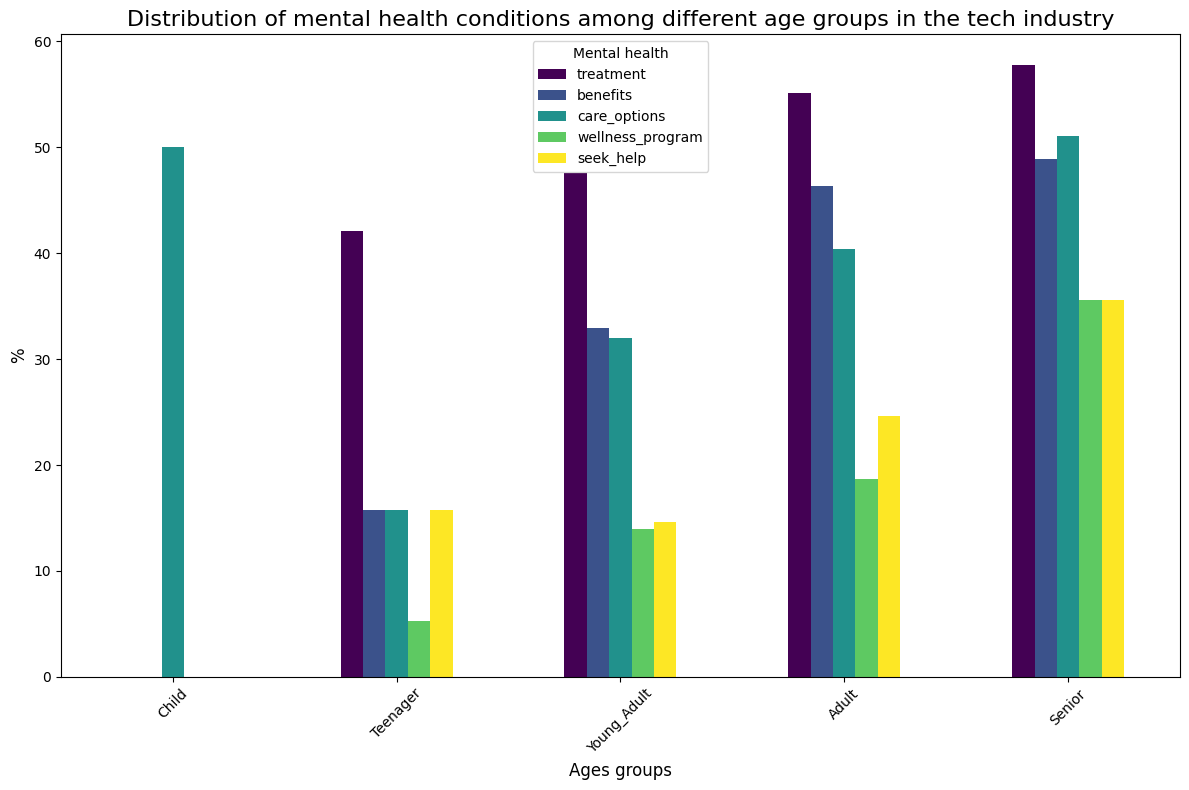

In [29]:
import matplotlib.pyplot as plt

mental_health_distribution.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.title('Distribution of mental health conditions among different age groups in the tech industry', fontsize=16)
plt.xlabel('Ages groups', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.legend(title='Mental health', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see here, that an older people asking for mental help often in tech industry. We can see why it happens - they have wellness programms and care options and they can feel more confident in mental health question. On the one hand, they seek help more often, on the other hand, this indicates their confidence that it will be confidential and they will receive help. In turn, the younger generation seeks help less often, but this does not mean that there are no problems. We see that in most cases they do not have additional health programs, so it is more difficult for them to find help and they are scared to talk about it.

In [34]:
print(mental['no_employees'].unique())


['1-5' '6-25' '100-500' '26-100' 'More than 1000' '500-1000']


In [36]:
import numpy as np
conditions = [
    mental['no_employees'].isin(['1-5', '6-25']),
    mental['no_employees'].isin(['26-100']),
    mental['no_employees'].isin(['100-500']),
    mental['no_employees'].isin(['More than 1000', '500-1000'])
]

labels = ['small', 'medium', 'big', 'corp']

mental['company_size'] = np.select(conditions, labels, default='NaN')

print(mental[['no_employees', 'company_size']].head())

   no_employees company_size
18          1-5        small
19         6-25        small
20      100-500          big
21          1-5        small
22       26-100       medium


In [39]:
gender_distribution = mental.groupby(['gender','company_size'])[
    ['treatment','benefits','care_options','wellness_program','seek_help', 'no_employees']
    ].apply(lambda x: (x == 1).mean() * 100)

print(gender_distribution)

                     treatment   benefits  care_options  wellness_program  \
gender company_size                                                         
0      big           70.454545  52.272727     31.818182         13.636364   
       corp          64.634146  74.390244     57.317073         35.365854   
       medium        71.698113  47.169811     45.283019         18.867925   
       small         68.181818  25.757576     34.848485         13.636364   
1      big           48.031496  42.519685     32.283465         15.748031   
       corp          46.062992  61.023622     37.795276         37.401575   
       medium        46.521739  32.173913     30.000000         12.608696   
       small         44.235925  15.013405     31.635389          6.702413   

                     seek_help  no_employees  
gender company_size                           
0      big            6.818182           0.0  
       corp          41.463415           0.0  
       medium        15.094340           

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


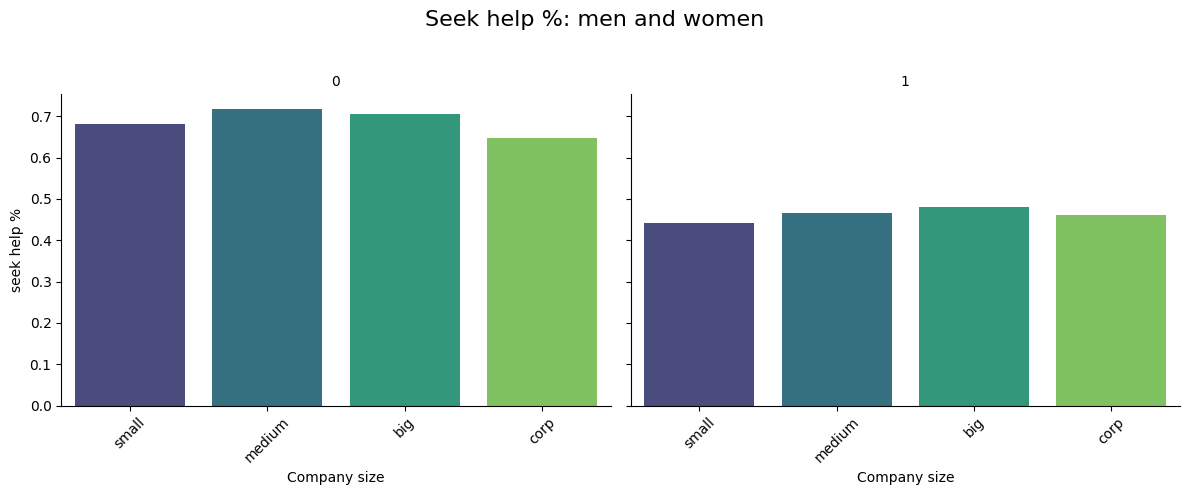

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.FacetGrid(mental, col='gender', height=5, aspect=1.2)

g.map(sns.barplot, 'company_size', 'treatment', order=['small', 'medium', 'big', 'corp'], errorbar=None, palette='viridis')

g.set_axis_labels("Company size", "seek help %")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Seek help %: men and women", fontsize=16)
g.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In our sample, the number of men predominates, and it is difficult to judge how often they seek help compared to women. However, it can be noted that such a factor as the size of the company does not affect this indicator. The conditions that the company provides in the field of health maintenance and the provision of additional programs have a greater impact.

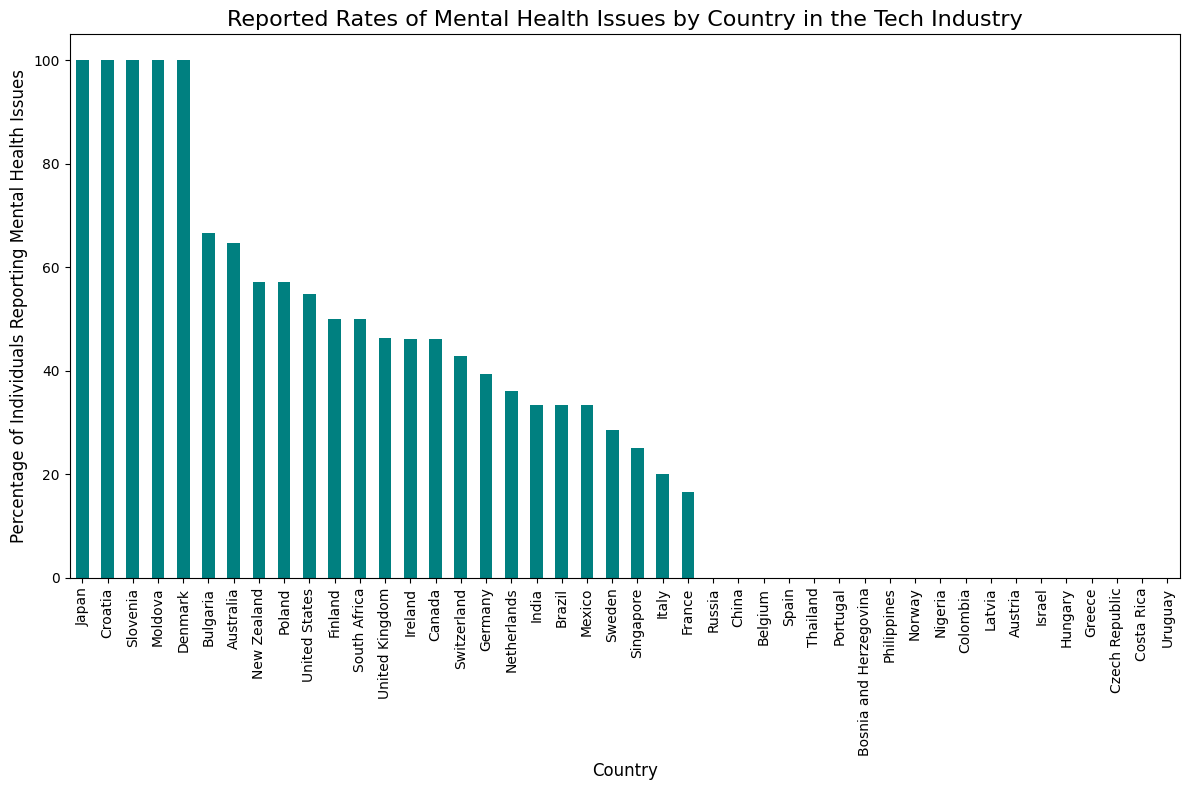

In [47]:
country_mental_health = mental_tech.groupby('country')['treatment'].mean() * 100

highest_rate_country = country_mental_health.idxmax()
lowest_rate_country = country_mental_health.idxmin()

highest_rate = country_mental_health.max()
lowest_rate = country_mental_health.min()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
country_mental_health.sort_values(ascending=False).plot(kind='bar', color='teal')

plt.title('Reported Rates of Mental Health Issues by Country in the Tech Industry', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Individuals Reporting Mental Health Issues', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

A large number of European countries, as well as the USA and Canada, stand out on this list. This tells us that in these countries, companies in tech industry are providing more mental health management options to workers. On the other hand, this shows us that in these countries the level of stress at work is high, which causes mental health problems to arise and people seek help. too low level of requests suggests that perhaps in these countries there is not enough attention to mental health issues, people are afraid to seek help or they do not have such opportunities, because companies do not invest enough in the development of additional programs for employees

